# Load libraries

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.datasets import make_classification

## Task 1: Implement Linear Regression

In [53]:
# Generate synthetic data for linear regression
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Features
y = 4 * X - 2 + np.random.randn(100, 1) * 0.5  # Target with noise
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Gradient Descent for Linear Regression
def gradient_descent(X, y, lr=0.01, epochs=1000, batch_size=None):
    m, n = X.shape
    X_b = np.c_[np.ones((m, 1)), X]  # Add bias term
    theta = np.random.randn(n + 1, 1)  # Initialize weights

    if batch_size is None:
        batch_size = m  # Full batch (BGD)

    for epoch in range(epochs):
        for i in range(0, m, batch_size):
            X_batch = X_b[i:i+batch_size]
            y_batch = y[i:i+batch_size]
            gradients = (2 / batch_size) * X_batch.T.dot(X_batch.dot(theta) - y_batch)
            theta -= lr * gradients  # Update weights

    return theta

In [55]:
# Train models
theta_bgd = gradient_descent(X_train, y_train, batch_size=len(X_train))  # BGD
theta_sgd = gradient_descent(X_train, y_train, batch_size=1)  # SGD
theta_mbgd = gradient_descent(X_train, y_train, batch_size=10)  # MBGD

In [56]:
# Predict function
def predict(X, theta):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    return X_b.dot(theta)

# Evaluate models
y_pred_bgd = predict(X_test, theta_bgd)
y_pred_sgd = predict(X_test, theta_sgd)
y_pred_mbgd = predict(X_test, theta_mbgd)

mse_bgd = mean_squared_error(y_test, y_pred_bgd)
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
mse_mbgd = mean_squared_error(y_test, y_pred_mbgd)

In [57]:
# Compare with Scikit-Learn
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_sklearn = lin_reg.predict(X_test)
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)

print("MSE - BGD:", mse_bgd)
print("MSE - SGD:", mse_sgd)
print("MSE - MBGD:", mse_mbgd)
print("MSE - Sklearn:", mse_sklearn)

MSE - BGD: 0.15893451868415628
MSE - SGD: 0.16199831911831872
MSE - MBGD: 0.1635794894379839
MSE - Sklearn: 0.1634248784292505


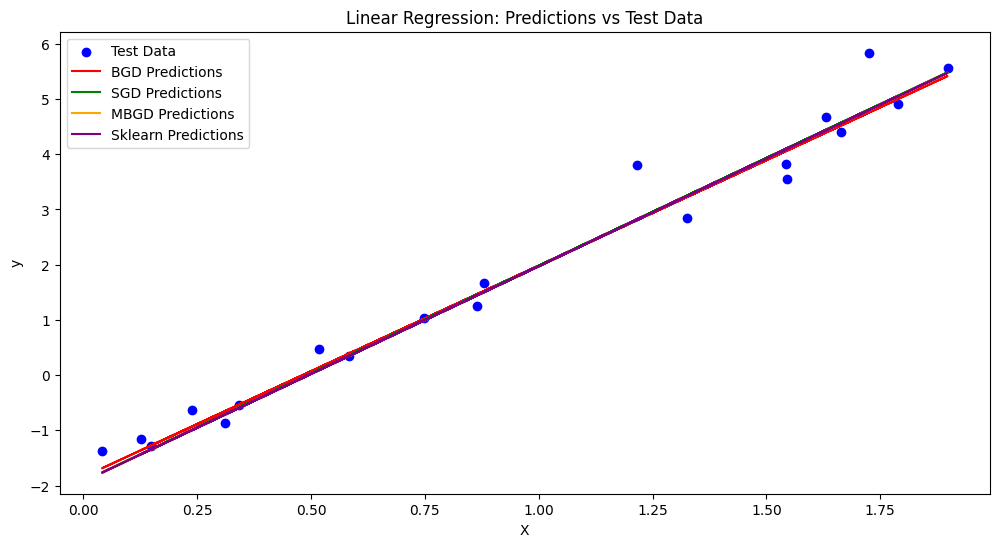

In [58]:
# Visualizations for Linear Regression

# Plot Linear Regression Results
plt.figure(figsize=(12, 6))

# Plot the data
plt.scatter(X_test, y_test, color='blue', label='Test Data')

# Plot the predictions
plt.plot(X_test, y_pred_bgd, color='red', label='BGD Predictions')
plt.plot(X_test, y_pred_sgd, color='green', label='SGD Predictions')
plt.plot(X_test, y_pred_mbgd, color='orange', label='MBGD Predictions')
plt.plot(X_test, y_pred_sklearn, color='purple', label='Sklearn Predictions')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression: Predictions vs Test Data')
plt.legend()
plt.show()

# Task 2: Implement Logistic Regression(for binary case)

In [59]:
# Generate classification data for Logistic Regression
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, random_state=42)
y = y.reshape(-1, 1)  # Reshape for consistency
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, lr=0.01, epochs=1000, batch_size=None):
    m, n = X.shape
    X_b = np.c_[np.ones((m, 1)), X]
    theta = np.random.randn(n + 1, 1)

    if batch_size is None:
        batch_size = m  # BGD

    for epoch in range(epochs):
        for i in range(0, m, batch_size):
            X_batch = X_b[i:i+batch_size]
            y_batch = y[i:i+batch_size]
            predictions = sigmoid(X_batch.dot(theta))
            gradients = (1 / batch_size) * X_batch.T.dot(predictions - y_batch)
            theta -= lr * gradients

    return theta

In [60]:
# Train Logistic Regression Models
theta_bgd = logistic_regression(X_train, y_train, batch_size=len(X_train))  # BGD
theta_sgd = logistic_regression(X_train, y_train, batch_size=1)  # SGD
theta_mbgd = logistic_regression(X_train, y_train, batch_size=10)  # MBGD

# Classify function
def classify(X, theta):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    return (sigmoid(X_b.dot(theta)) >= 0.5).astype(int)

In [61]:
# Evaluate Logistic Regression Models
y_pred_bgd = classify(X_test, theta_bgd)
y_pred_sgd = classify(X_test, theta_sgd)
y_pred_mbgd = classify(X_test, theta_mbgd)

acc_bgd = accuracy_score(y_test, y_pred_bgd)
acc_sgd = accuracy_score(y_test, y_pred_sgd)
acc_mbgd = accuracy_score(y_test, y_pred_mbgd)

In [62]:
# Compare with Scikit-Learn
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train.ravel())
y_pred_sklearn = log_reg.predict(X_test)
acc_sklearn = accuracy_score(y_test, y_pred_sklearn)

print("Accuracy - BGD:", acc_bgd)
print("Accuracy - SGD:", acc_sgd)
print("Accuracy - MBGD:", acc_mbgd)
print("Accuracy - Sklearn:", acc_sklearn)

Accuracy - BGD: 0.775
Accuracy - SGD: 0.8
Accuracy - MBGD: 0.8
Accuracy - Sklearn: 0.8


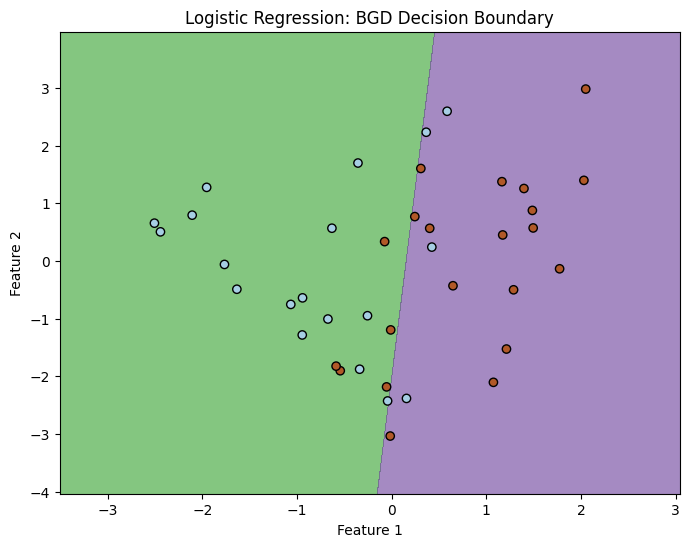

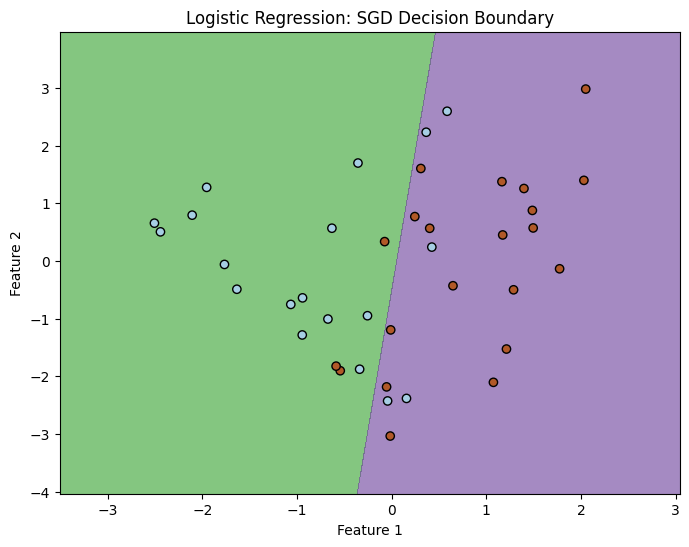

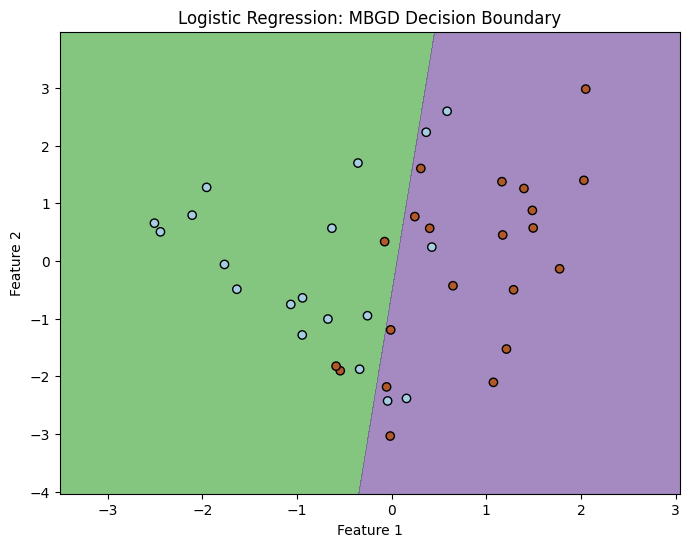

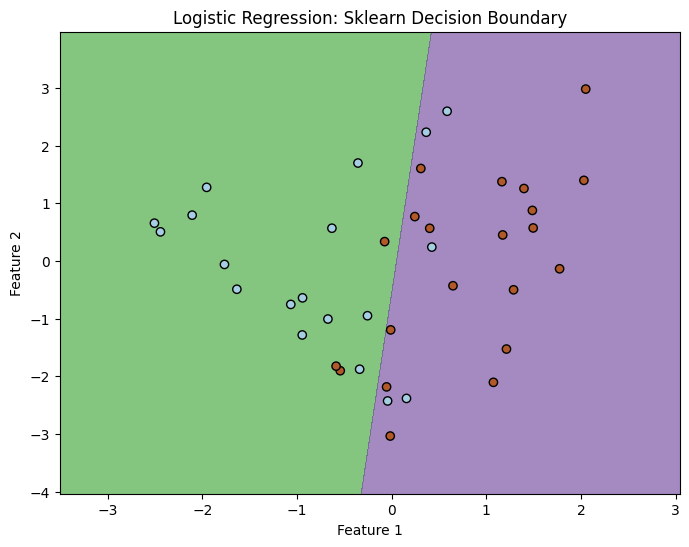

In [63]:
# Visualizations for Logistic Regression
# Plot Logistic Regression Decision Boundaries
def plot_decision_boundary(X, y, theta, title):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                           np.arange(x2_min, x2_max, 0.01))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    grid_b = np.c_[np.ones((grid.shape[0], 1)), grid]
    probs = sigmoid(grid_b.dot(theta)).reshape(xx1.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx1, xx2, probs, levels=[0, 0.5, 1], cmap=plt.cm.Paired, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolors='k', marker='o', cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot decision boundaries for BGD, SGD, MBGD, and Sklearn
plot_decision_boundary(X_test, y_test, theta_bgd, 'Logistic Regression: BGD Decision Boundary')
plot_decision_boundary(X_test, y_test, theta_sgd, 'Logistic Regression: SGD Decision Boundary')
plot_decision_boundary(X_test, y_test, theta_mbgd, 'Logistic Regression: MBGD Decision Boundary')

# For Sklearn, extract coefficients and intercept
theta_sklearn = np.r_[log_reg.intercept_.reshape(-1, 1), log_reg.coef_.T]
plot_decision_boundary(X_test, y_test, theta_sklearn, 'Logistic Regression: Sklearn Decision Boundary')